# 1.Definição do problema
---
Competição para você tem alguma experiência com R ou Python e noções básicas de aprendizado de máquina, mas é novo na visão computacional. Esta competição é a introdução perfeita a técnicas como redes neurais usando um conjunto de dados clássico, incluindo recursos pré-extraídos. 

![texto alternativo](https://www.wolfram.com/mathematica/new-in-10/highly-automated-machine-learning/HTMLImages.en/create-a-handwritten-digit-recognizer/In_1.png)

MNIST ("Instituto Nacional de Padrões e Tecnologia Modificada") é o conjunto de dados de fato para o “Hello World” da visão computacional. Desde seu lançamento em 1999, esse conjunto de dados clássico de imagens manuscritas serviu de base para algoritmos de classificação de benchmarking. À medida que surgem novas técnicas de aprendizado de máquina, o MNIST continua sendo um recurso confiável para pesquisadores e alunos. Nesta competição, seu objetivo é identificar corretamente os dígitos de um conjunto de dados de dezenas de milhares de imagens manuscritas. Recomendamos que você experimente algoritmos diferentes para aprender em primeira mão o que funciona bem e como as técnicas se comparam. 
Habilidades práticas: 
* Fundamentos da visão computacional, incluindo redes neurais simples. 
* Métodos de classificação como SVM, KNN...

Mais detalhes sobre o conjunto de dados, incluindo algoritmos que foram testados e seus níveis de sucesso, podem ser encontrados em http://yann.lecun.com/exdb/mnist/index.html


In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

#2. Aquisição dados

In [2]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
# Carregar Dataset
train=pd.read_csv('train.csv')
test_images=pd.read_csv('test.csv')

In [4]:
# Separar em "X_Train" e "Y_train"

# X_Train: axis=1 para dropar toda coluna target "label"
train_images=train.drop('label',axis=1)

#Y_Train
train_labels=train['label']

In [5]:
# Visualizar dataset
train_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#3. Preparar dados

In [6]:
# Missing Values ?
train_images.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [7]:
# Normalização dos dados para escala de cinza
train_images=train_images/255.0
test_images=test_images/255.0

In [8]:
# Modelamos os dados para 28x28x1, afinal, possuimos as imagens no formato de vetor 1D com 784 valores
train_images=train_images.values.reshape(len(train_images),28,28,1)
test_images=test_images.values.reshape(len(test_images),28,28,1)

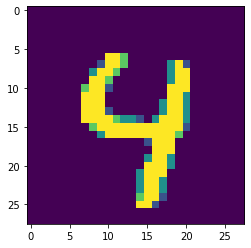

In [9]:
# Podemos visualizar 1 amostra
plt.imshow(train_images[78][:,:,0])

#4. Modelo preditivo

In [10]:
# Carregar libs para modelo preditivo
import tensorflow as tf
from tensorflow import keras

In [11]:
def build_model(hp):
    model=keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),   # escolherá um valor do range
            kernel_size=hp.Choice('conv_1_kernel', values = [3,5,7]),                # escolherá apenas os melhores valores
            activation='relu',
            input_shape=(28,28,1)                                                    
        ),
         keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values = [3,5,7]),
            activation='relu'
         ),
         keras.layers.Flatten(),
         keras.layers.Dense(
             units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
             activation='relu'
             ),
        keras.layers.Dense(10, activation='softmax')     
        ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    return model

# RELU ACTIVATION
![texto alternativo](https://www.researchgate.net/profile/Hossam_H_Sultan/publication/333411007/figure/fig7/AS:766785846525952@1559827400204/ReLU-activation-function.png)

#FLATTENING
![texto alternativo](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

#SOFTMAX
![texto alternativo](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRhFghoIFWRy3q2baN_mODkmVnP1ZsrDR1pOg&usqp=CAU)

#5. melhorias

In [12]:
!pip install keras-tuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

     |████████████████████████████████| 54 kB 174 kB/s eta 0:00:011
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-py3-none-any.whl size=73198 sha256=0374eb0267aec325e680a003db10e568368737026a796a7a9724629b74b12141
  Stored in directory: /home/luna/.cache/pip/wheels/62/84/96/51c62791835c5185b9f66e915e19ae7c20f3d8c40443b3e9fa
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=1236a1cf54d121854b16a5499a2fbfa03d025fdf85cf7233097c60d2739e5fdd
  Stored in directory: /home/luna/.cache/pip/wheels/08/8f/5f/253d0105a55bd84ee61ef0d37dbf70421e61e0cd70cef7c5e1
Successfully built keras-tuner terminaltables


In [13]:
"""
O RandomSearch é surpreendentemente eficiente em comparação com o GridSearch. 
Embora o GridSearch encontre o valor ideal dos hiperparâmetros (supondo que eles estejam na sua grade) 
eventualmente, o RandomSearch geralmente encontrará um valor "suficientemente próximo" em muito menos iterações. 
"""
tuner_search = RandomSearch(build_model,max_trials=5,objective='val_accuracy')

In [14]:
# Precisão do número de tentativas e hiperparâmetros usados ​​para cada tentativa(pode levar muito tempo)
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1,verbose=2)

Epoch 1/3
1182/1182 - 231s - loss: 0.1313 - accuracy: 0.9591 - val_loss: 0.0678 - val_accuracy: 0.9788
Epoch 2/3
1182/1182 - 227s - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.0372 - val_accuracy: 0.9874
Epoch 3/3
1182/1182 - 222s - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0518 - val_accuracy: 0.9840


Epoch 1/3


KeyboardInterrupt: 

In [ ]:
# Escolhemos apenas os melhores modelos
model = tuner_search.get_best_models(num_models=1)[0]
model.summary()

In [ ]:
# Treinamos
model.fit(train_images, train_labels, epochs=8,initial_epoch=3, validation_split=0.1,verbose=1)

In [ ]:
# Preparamos predições

# Coluna ImageId
test_pred = pd.DataFrame(model.predict(test_images, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'

# Coluna "Label"
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

#6. Submeter ao kaggle

In [ ]:
# Preparamos nossa submissão
test_pred.to_csv('submission.csv', index = False)